In [2]:
import numpy as np
import pandas as pd

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None) # Make sure to skip a row for the test set

In [4]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

In [7]:
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
#There don’t seem to be any. According to the accompanying notes, the original datasets had 32561 in train and 16281 with test. 
#However, unknowns are included and have been labeled with a question mark (?). The test results documented were done after 
#removing all unknowns. Therefore, to see if we can beat their best results, we need to remove the same unknown rows.
#If we do so, we should have 30162 in train and 15060 in test. Let’s see if we can remove all of these unknown rows.
#It turns out the question mark was actually entered with a space first. Let’s do a simple test to see what would happen,
#if we dropped all rows that contain an unknown marked with a ‘ ?’.

In [11]:
train_set.replace(' ?', np.nan).dropna().shape 

(30162, 15)

In [12]:
test_set.replace(' ?', np.nan).dropna().shape

(15060, 15)

In [13]:
#These must be our missing rows since the numbers add up now if we drop them. Let’s apply this change to our test and training sets.

In [14]:
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [15]:
#Now that we have taken care of the missing value problem, we still have an issue with the target income thresholds being encoded 
#slightly differently in test vs. train. We need these to match up appropriately, so we are going to need to fix either the 
#test or training set to make them match up. Let’s replace all of the ‘<=50K.’ with ‘<=50K’ and the same for ‘>50K.’ with 
#‘>50K’, so essentially, we are just dropping the periods. This is also encoded with a space so include this in the string. 
#We can use the replace method from pandas to fix this.

In [16]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [17]:
#Checking the unique values from each set, we can see if they now match.

In [18]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [20]:
#Now these look the same. There is one thing we need to do, however, before applying XGBoost. We need to make sure everything 
#encoded as a string is turned into a variable.

In [21]:
#Applying Ordinal Encoding to Categoricals
#Our next step is to use ordinal encoding for the features with a string category since XGBoost (like all of the other machine 
#learning algorithms in Python) requires every feature vector to include only digits. To do this properly, however, 
#we will need to join the two together and apply our encoding so that the same categories exist in both datasets when 
#we do train/test evalulation.

In [22]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [23]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [24]:
#We can see they are now combined. Next, if the feature is not already numerical, we need to encode it as one. 
#We can use pandas Categorical codes for this task. 

In [25]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer

In [26]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [27]:
#Now that we have all of our features encoded, we need to split these back into their original train/test sizes. 
#Since they haven’t been shuffled we just need to retrieve the same indices as before.

In [28]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [29]:
#Initial Model Setup and Grid Search
#We still have our target value inside our train and test frames that needs to be separated from the feature vectors 
#we will be feeding into XGBoost. Let’s get those now.

In [30]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [32]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [33]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [34]:
#Now let’s run our grid search with 5-fold cross-validation and see which parameters perform the best.

In [35]:
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [36]:
optimized_GBM.grid_scores_

[mean: 0.86712, std: 0.00225, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86659, std: 0.00295, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86214, std: 0.00197, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86161, std: 0.00143, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86208, std: 0.00236, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85651, std: 0.00183, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85575, std: 0.00246, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85694, std: 0.00347, params: {'max_depth': 7, 'min_child_weight': 5}]

In [37]:
#We can see that the first hyperparameter combination performed best and we already beat our target of 85.95% accuracy 
#in our cross-validation! Let’s try optimizing some other hyperparameters now to see if we can beat a mean of 86.78% accuracy. 
#This time, we will play around with subsampling along with lowering the learning rate to see if that helps.

In [38]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [39]:
#Again, check the grid scores.

In [40]:
optimized_GBM.grid_scores_

[mean: 0.86622, std: 0.00198, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86712, std: 0.00225, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86758, std: 0.00299, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.86052, std: 0.00290, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86029, std: 0.00297, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86025, std: 0.00341, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [41]:
#No, it doesn’t look like we can improve on this. However, we may be able to optimize a little further by utilizing 
#XGBoost’s built-in cv which allows early stopping to prevent overfitting.

In [43]:
#Early stopping CV
#Based on the CV testing performed earlier, we want to utilize the following parameters:
#Learning_rate (eta) = 0.1
#Subsample, colsample_bytree = 0.8
#Max_depth = 3
#Min_child_weight = 1
#There are a few other parameters we could tune in theory to squeeze out further performance, but this is a good enough starting point.
#To increase the performance of XGBoost’s speed through many iterations of the training set, 
#and since we are using only XGBoost’s API and not sklearn’s anymore, we can create a DMatrix. 
#This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. 
#This is especially helpful when you have a very large number of training examples. To create a DMatrix:

In [44]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

In [45]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [47]:
#Will train until cv error hasn't decreased in 100 rounds. Stopping. Best iteration: 432

In [48]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
489,0.115584,0.001395,0.129998,0.004691
490,0.115617,0.001414,0.129965,0.004479
491,0.115501,0.001397,0.129965,0.004494
492,0.115501,0.001483,0.129964,0.004581
493,0.115385,0.001528,0.129932,0.004657


In [49]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [50]:
#Notice that it trains very quickly. With our XG model object, we can then plot our feature importances using 
#a built-in method. This is similar to the feature importances found in sklearn.

In [51]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

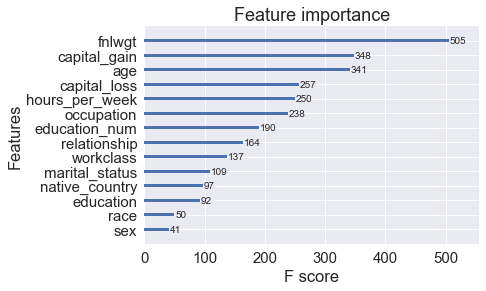

In [52]:
xgb.plot_importance(final_gb)

In [53]:
#This will tell us which features were most important in the series of trees. The ‘fnlwgt’ feature 
#seems to have the most importance. Filing capital gains was also important, which makes sense given 
#that only those with greater incomes have the ability to invest. Race and sex were not as important. 
#This may be because we are just predicting a specific threshold (below/above 50000 a year) instead of a precise income.
#If the built-in feature importance method isn’t what you wanted, you can make your own chart of feature importances 
#using the get_fscore method:

In [54]:
importances = final_gb.get_fscore()
importances

{'relationship': 164,
 'capital_gain': 348,
 'education': 92,
 'fnlwgt': 505,
 'marital_status': 109,
 'education_num': 190,
 'capital_loss': 257,
 'age': 341,
 'hours_per_week': 250,
 'occupation': 238,
 'workclass': 137,
 'sex': 41,
 'native_country': 97,
 'race': 50}

In [56]:
#Given this dictionary, we can now make a plot of it ourselves.

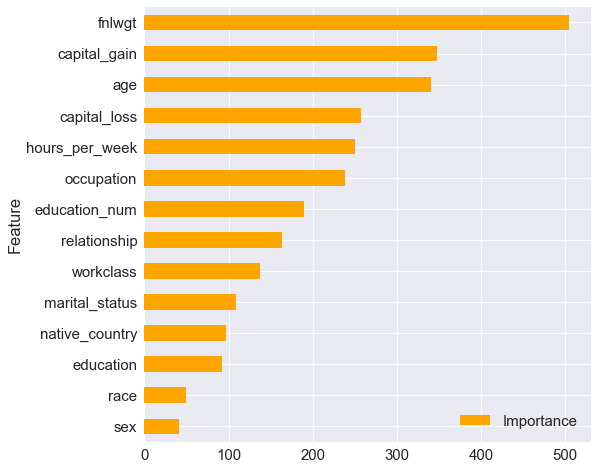

In [57]:
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')

In [58]:
#Now that we have an understanding of the feature importances, we can at least figure out better what is 
#driving the splits most for the trees and where we may be able to make some improvements in feature engineering 
#if possible. You can try playing around with the hyperparameters yourself or engineer some new features to see 
#if you can beat the current benchmarks.

In [59]:
#Analyzing Performance on Test Data
#The model has now been tuned using cross-validation grid search through the sklearn API and early stopping through 
#the built-in XGBoost API. Now, we can see how it finally performs on the test set. Does it match our CV performance? 
#First, create another DMatrix (this time for the test data).

In [60]:
testdmat = xgb.DMatrix(final_test)

In [61]:
#Now let’s use sklearn’s accuracy metric to see how well we did on the test set.

In [62]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.00279659, 0.20289436, 0.2911482 , ..., 0.84031725, 0.12937884,
       0.774844  ], dtype=float32)

In [63]:
#You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. 
#To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold.

In [64]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [65]:
#Now we can calculate our accuracy.

In [66]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8685258964143426, 0.13147410358565736)

In [67]:
#Our final accuracy is 86.94%, or a 13.05% error rate. We beat our goal by a whole percentage point!
#There is probably more that we could do to improve this model, such as additional hyperparameter tuning or 
#even some additional feature engineering. However, according to the guidelines of the original data, 
#we beat their best performance. 